<a href="https://colab.research.google.com/github/Eliza712222/TALLER_PRACTICO/blob/main/TALLER_PRACTICO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

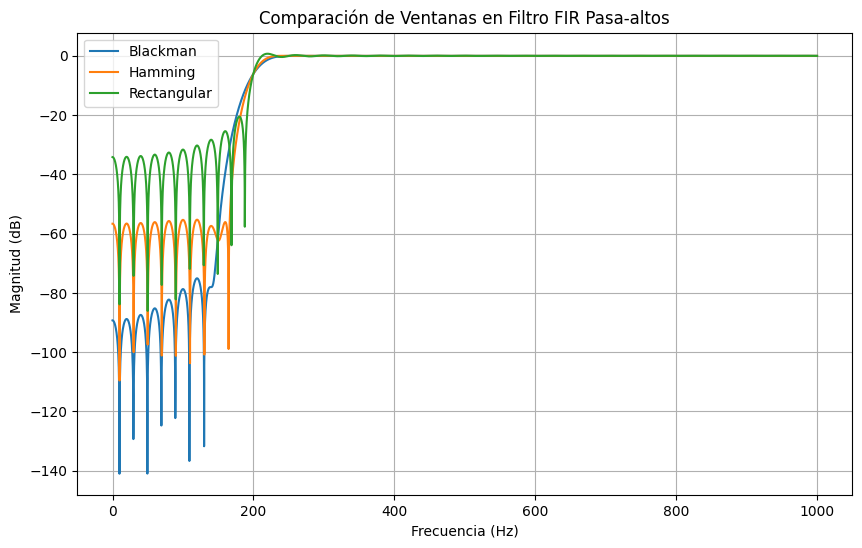

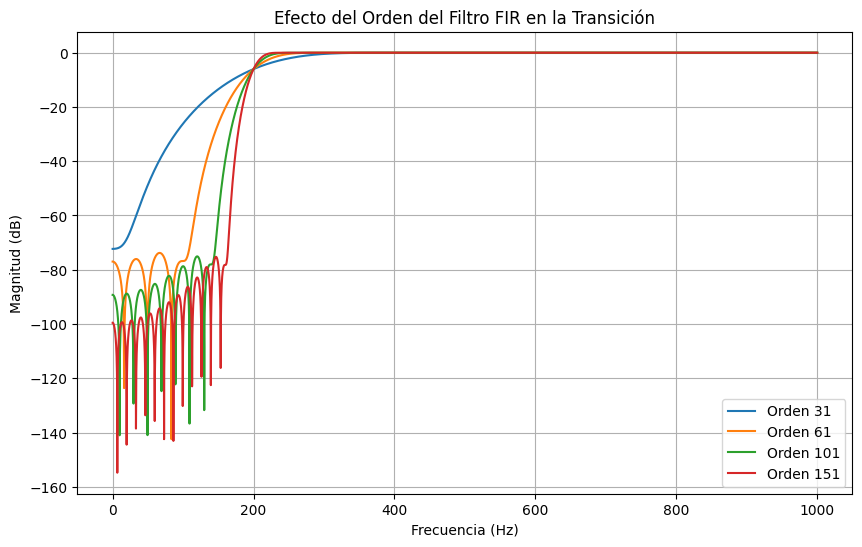

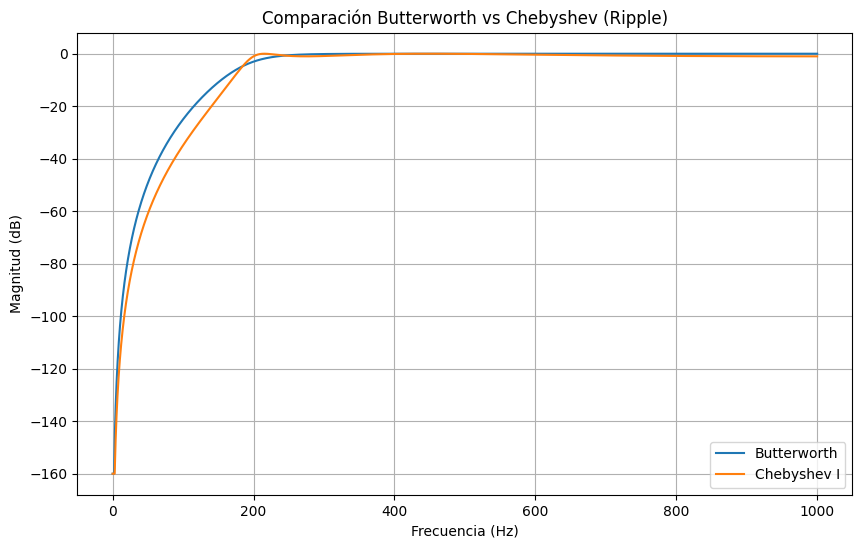

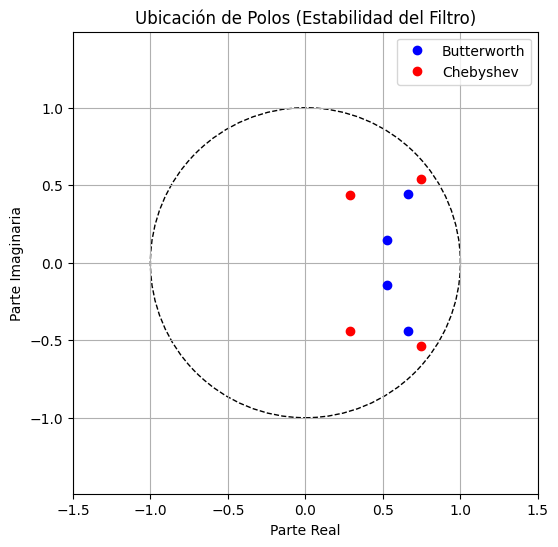

In [4]:
# FILTRO FIR
# =============================================
# EJERCICIOS PRACTICOS  DE SISTEMAS Y SEÑALES 2
# FITROS  FIR -FILTROS IIR - Comparación y análisis
# =============================================
# ELIZABETH HOSTEN - CARLOS NUÑEZ


# Permite que matplotlib dibuje gráficos en la celda

%matplotlib inline


# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, butter, cheby1
from numpy import roots

# -----------------------------
# PARÁMETROS GENERALES
# -----------------------------
fs = 2000  # Frecuencia de muestreo (Hz)
fc = 200   # Frecuencia de corte (Hz)

# -----------------------------
# FIR - Filtro pasa-altos
# -----------------------------

# Diseño con ventana Blackman
numtaps = 101  # Orden del filtro (puede variarse)
fir_blackman = firwin(numtaps, fc, fs=fs, window='blackman', pass_zero=False)

# Comparación con diferentes ventanas
fir_hamming = firwin(numtaps, fc, fs=fs, window='hamming', pass_zero=False)
fir_rectangular = firwin(numtaps, fc, fs=fs, window='boxcar', pass_zero=False)

# Respuesta en frecuencia (FIR con distintas ventanas)
w, h_blackman = freqz(fir_blackman, worN=8000)
_, h_hamming = freqz(fir_hamming, worN=8000)
_, h_rectangular = freqz(fir_rectangular, worN=8000)

plt.figure(figsize=(10,6))
plt.title('Comparación de Ventanas en Filtro FIR Pasa-altos')
plt.plot((w/np.pi)*(fs/2), 20*np.log10(np.maximum(abs(h_blackman), 1e-8)), label='Blackman')  # Graficar la magnitud del filtro FIR usando ventana Blackman
plt.plot((w/np.pi)*(fs/2), 20*np.log10(np.maximum(abs(h_hamming), 1e-8)), label='Hamming')
plt.plot((w/np.pi)*(fs/2), 20*np.log10(np.maximum(abs(h_rectangular), 1e-8)), label='Rectangular')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.legend()
plt.grid()
plt.show()

# -----------------------------
# Efecto del orden del filtro FIR
# -----------------------------
orders = [31, 61, 101, 151]
plt.figure(figsize=(10,6))
plt.title('Efecto del Orden del Filtro FIR en la Transición')
for n in orders:
    h = firwin(n, fc, fs=fs, window='blackman', pass_zero=False)
    w, H = freqz(h, worN=8000)
    plt.plot((w/np.pi)*(fs/2), 20*np.log10(np.maximum(abs(H), 1e-8)), label=f'Orden {n}')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.legend()
plt.grid()
plt.show()

# -----------------------------
# IIR - Filtro Butterworth y Chebyshev
# -----------------------------
order = 4

# Diseño Butterworth
b_butter, a_butter = butter(order, fc/(fs/2), btype='high', analog=False)

# Diseño Chebyshev tipo I
b_cheby, a_cheby = cheby1(order, 1, fc/(fs/2), btype='high', analog=False)

# Respuesta en frecuencia (IIR)
w, h_butter = freqz(b_butter, a_butter, worN=8000)
_, h_cheby = freqz(b_cheby, a_cheby, worN=8000)

plt.figure(figsize=(10,6))
plt.title('Comparación Butterworth vs Chebyshev (Ripple)')
plt.plot((w/np.pi)*(fs/2), 20*np.log10(np.maximum(abs(h_butter), 1e-8)), label='Butterworth')
plt.plot((w/np.pi)*(fs/2), 20*np.log10(np.maximum(abs(h_cheby), 1e-8)), label='Chebyshev I')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.legend()
plt.grid()
plt.show()

# -----------------------------
# Verificación de estabilidad (Ubicación de polos)
# -----------------------------
p_butter = roots(a_butter)
p_cheby = roots(a_cheby)

plt.figure(figsize=(6,6))
plt.title('Ubicación de Polos (Estabilidad del Filtro)')
plt.plot(np.real(p_butter), np.imag(p_butter), 'ob', label='Butterworth')
plt.plot(np.real(p_cheby), np.imag(p_cheby), 'or', label='Chebyshev')

# Círculo unitario de referencia
circle = plt.Circle((0,0), 1, color='k', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.axis('equal')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.legend()
plt.grid()
plt.show()